# Feature variation by substitution ($\nu_{\phi}$)

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count', 'synonyms_count',
                  'orthographical_density']
N_COMPONENTS = 3

Imports and database setup.

In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from progressbar import ProgressBar

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope
engine = init_db()

## 2 Variation of features upon substitution

First build our data.

In [3]:
model = Model(time=Time.discrete, source=Source.all, past=Past.last_bin, durl=Durl.exclude_past)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id).filter(Substitution.model == model)
    print("Got {} substitutions for model {}".format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, destination = substitution.features(feature)
            source_rel, destination_rel = substitution.features(feature,
                                                                sentence_relative='median')
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'feature': feature,
                         'source': source,
                         'source_rel': source_rel,
                         'destination': destination,
                         'destination_rel': destination_rel,
                         'h0': substitution.feature_average(feature),
                         'h0_rel': substitution.feature_average(feature,
                                                                sentence_relative='median'),
                         'h0n': substitution.feature_average(feature,
                                                             source_synonyms=True),
                         'h0n_rel': substitution.feature_average(feature,
                                                                 source_synonyms=True,
                                                                 sentence_relative='median')})

original_variations = pd.DataFrame(data)
del data

Got 8349 substitutions for model Model(time=Time.discrete, source=Source.all, past=Past.last_bin, durl=Durl.exclude_past)


  0% (   1 of 8349) |             | Elapsed Time: 0:00:26 ETA:  2 days, 12:28:04

  0% (  80 of 8349) |                      | Elapsed Time: 0:00:27 ETA:  0:01:18

  1% ( 105 of 8349) |                      | Elapsed Time: 0:00:27 ETA:  0:01:21

  2% ( 179 of 8349) |                      | Elapsed Time: 0:00:28 ETA:  0:01:22

  2% ( 209 of 8349) |                      | Elapsed Time: 0:00:28 ETA:  0:01:22

  3% ( 290 of 8349) |                      | Elapsed Time: 0:00:29 ETA:  0:01:19

  3% ( 314 of 8349) |                      | Elapsed Time: 0:00:30 ETA:  0:01:17

  4% ( 397 of 8349) |#                     | Elapsed Time: 0:00:31 ETA:  0:01:15

  5% ( 418 of 8349) |#                     | Elapsed Time: 0:00:31 ETA:  0:01:14

  6% ( 505 of 8349) |#                     | Elapsed Time: 0:00:32 ETA:  0:01:12

  6% ( 522 of 8349) |#                     | Elapsed Time: 0:00:32 ETA:  0:01:11

  7% ( 602 of 8349) |#                     | Elapsed Time: 0:00:33 ETA:  0:01:09

  7% ( 627 of 8349) |#                     | Elapsed Time: 0:00:33 ETA:  0:01:08

  8% ( 702 of 8349) |#                     | Elapsed Time: 0:00:34 ETA:  0:01:08

  8% ( 731 of 8349) |#                     | Elapsed Time: 0:00:35 ETA:  0:01:08

  9% ( 809 of 8349) |##                    | Elapsed Time: 0:00:36 ETA:  0:01:08

 10% ( 835 of 8349) |##                    | Elapsed Time: 0:00:36 ETA:  0:01:08

 10% ( 913 of 8349) |##                    | Elapsed Time: 0:00:37 ETA:  0:01:08

 11% ( 940 of 8349) |##                    | Elapsed Time: 0:00:38 ETA:  0:01:10

 12% (1017 of 8349) |##                    | Elapsed Time: 0:00:39 ETA:  0:01:09

 12% (1044 of 8349) |##                    | Elapsed Time: 0:00:39 ETA:  0:01:09

 13% (1122 of 8349) |##                    | Elapsed Time: 0:00:40 ETA:  0:01:08

 13% (1148 of 8349) |###                   | Elapsed Time: 0:00:40 ETA:  0:01:07

 14% (1227 of 8349) |###                   | Elapsed Time: 0:00:41 ETA:  0:01:05

 15% (1253 of 8349) |###                   | Elapsed Time: 0:00:42 ETA:  0:01:05

 15% (1327 of 8349) |###                   | Elapsed Time: 0:00:43 ETA:  0:01:05

 16% (1357 of 8349) |###                   | Elapsed Time: 0:00:43 ETA:  0:01:04

 17% (1443 of 8349) |###                   | Elapsed Time: 0:00:44 ETA:  0:01:02

 17% (1462 of 8349) |###                   | Elapsed Time: 0:00:44 ETA:  0:01:01

 18% (1540 of 8349) |####                  | Elapsed Time: 0:00:45 ETA:  0:01:00

 18% (1566 of 8349) |####                  | Elapsed Time: 0:00:45 ETA:  0:00:59

 19% (1652 of 8349) |####                  | Elapsed Time: 0:00:47 ETA:  0:00:57

 20% (1670 of 8349) |####                  | Elapsed Time: 0:00:47 ETA:  0:00:56

 21% (1755 of 8349) |####                  | Elapsed Time: 0:00:48 ETA:  0:00:54

 21% (1775 of 8349) |####                  | Elapsed Time: 0:00:48 ETA:  0:00:52

 22% (1851 of 8349) |####                  | Elapsed Time: 0:00:49 ETA:  0:00:52

 22% (1879 of 8349) |####                  | Elapsed Time: 0:00:49 ETA:  0:00:53

 23% (1958 of 8349) |#####                 | Elapsed Time: 0:00:50 ETA:  0:00:52

 23% (1983 of 8349) |#####                 | Elapsed Time: 0:00:51 ETA:  0:00:52

 24% (2064 of 8349) |#####                 | Elapsed Time: 0:00:52 ETA:  0:00:51

 25% (2088 of 8349) |#####                 | Elapsed Time: 0:00:52 ETA:  0:00:53

 25% (2162 of 8349) |#####                 | Elapsed Time: 0:00:53 ETA:  0:00:54

 26% (2192 of 8349) |#####                 | Elapsed Time: 0:00:53 ETA:  0:00:55

 26% (2237 of 8349) |#####                 | Elapsed Time: 0:00:55 ETA:  0:01:09

 27% (2296 of 8349) |######                | Elapsed Time: 0:00:56 ETA:  0:01:09

 28% (2377 of 8349) |######                | Elapsed Time: 0:00:57 ETA:  0:01:05

 28% (2401 of 8349) |######                | Elapsed Time: 0:00:57 ETA:  0:01:07

 29% (2483 of 8349) |######                | Elapsed Time: 0:00:58 ETA:  0:01:02

 30% (2505 of 8349) |######                | Elapsed Time: 0:00:58 ETA:  0:01:04

 30% (2586 of 8349) |######                | Elapsed Time: 0:00:59 ETA:  0:01:00

 31% (2610 of 8349) |######                | Elapsed Time: 0:01:00 ETA:  0:01:00

 32% (2695 of 8349) |#######               | Elapsed Time: 0:01:01 ETA:  0:00:56

 32% (2714 of 8349) |#######               | Elapsed Time: 0:01:01 ETA:  0:00:41

 33% (2794 of 8349) |#######               | Elapsed Time: 0:01:02 ETA:  0:00:40

 33% (2818 of 8349) |#######               | Elapsed Time: 0:01:02 ETA:  0:00:40

 34% (2899 of 8349) |#######               | Elapsed Time: 0:01:03 ETA:  0:00:39

 35% (2923 of 8349) |#######               | Elapsed Time: 0:01:03 ETA:  0:00:38

 36% (3010 of 8349) |#######               | Elapsed Time: 0:01:04 ETA:  0:00:36

 36% (3027 of 8349) |#######               | Elapsed Time: 0:01:05 ETA:  0:00:36

 37% (3112 of 8349) |########              | Elapsed Time: 0:01:06 ETA:  0:00:34

 37% (3131 of 8349) |########              | Elapsed Time: 0:01:06 ETA:  0:00:34

 38% (3215 of 8349) |########              | Elapsed Time: 0:01:07 ETA:  0:00:33

 38% (3236 of 8349) |########              | Elapsed Time: 0:01:07 ETA:  0:00:32

 39% (3317 of 8349) |########              | Elapsed Time: 0:01:08 ETA:  0:00:31

 40% (3340 of 8349) |########              | Elapsed Time: 0:01:08 ETA:  0:00:31

 40% (3422 of 8349) |#########             | Elapsed Time: 0:01:09 ETA:  0:00:30

 41% (3444 of 8349) |#########             | Elapsed Time: 0:01:10 ETA:  0:00:31

 42% (3524 of 8349) |#########             | Elapsed Time: 0:01:11 ETA:  0:00:31

 42% (3549 of 8349) |#########             | Elapsed Time: 0:01:11 ETA:  0:00:32

 43% (3630 of 8349) |#########             | Elapsed Time: 0:01:12 ETA:  0:00:31

 43% (3653 of 8349) |#########             | Elapsed Time: 0:01:12 ETA:  0:00:33

 44% (3726 of 8349) |#########             | Elapsed Time: 0:01:13 ETA:  0:00:33

 45% (3758 of 8349) |#########             | Elapsed Time: 0:01:14 ETA:  0:00:34

 45% (3839 of 8349) |##########            | Elapsed Time: 0:01:15 ETA:  0:00:32

 46% (3862 of 8349) |##########            | Elapsed Time: 0:01:15 ETA:  0:00:32

 47% (3949 of 8349) |##########            | Elapsed Time: 0:01:16 ETA:  0:00:29

 47% (3966 of 8349) |##########            | Elapsed Time: 0:01:16 ETA:  0:00:29

 48% (4046 of 8349) |##########            | Elapsed Time: 0:01:17 ETA:  0:00:28

 48% (4071 of 8349) |##########            | Elapsed Time: 0:01:18 ETA:  0:00:28

 49% (4152 of 8349) |##########            | Elapsed Time: 0:01:19 ETA:  0:00:25

 50% (4175 of 8349) |###########           | Elapsed Time: 0:01:19 ETA:  0:00:23

 51% (4259 of 8349) |###########           | Elapsed Time: 0:01:20 ETA:  0:00:21

 51% (4279 of 8349) |###########           | Elapsed Time: 0:01:20 ETA:  0:00:20

 52% (4361 of 8349) |###########           | Elapsed Time: 0:01:21 ETA:  0:00:19

 52% (4384 of 8349) |###########           | Elapsed Time: 0:01:21 ETA:  0:00:20

 53% (4465 of 8349) |###########           | Elapsed Time: 0:01:22 ETA:  0:00:19

 53% (4488 of 8349) |###########           | Elapsed Time: 0:01:23 ETA:  0:00:18

 54% (4568 of 8349) |############          | Elapsed Time: 0:01:24 ETA:  0:00:17

 55% (4592 of 8349) |############          | Elapsed Time: 0:01:24 ETA:  0:00:17

 56% (4676 of 8349) |############          | Elapsed Time: 0:01:25 ETA:  0:00:16

 56% (4697 of 8349) |############          | Elapsed Time: 0:01:25 ETA:  0:00:16

 57% (4782 of 8349) |############          | Elapsed Time: 0:01:26 ETA:  0:00:14

 57% (4801 of 8349) |############          | Elapsed Time: 0:01:27 ETA:  0:00:14

 58% (4879 of 8349) |############          | Elapsed Time: 0:01:28 ETA:  0:00:14

 58% (4906 of 8349) |############          | Elapsed Time: 0:01:28 ETA:  0:00:14

 59% (4988 of 8349) |#############         | Elapsed Time: 0:01:29 ETA:  0:00:13

 60% (5010 of 8349) |#############         | Elapsed Time: 0:01:29 ETA:  0:00:12

 60% (5092 of 8349) |#############         | Elapsed Time: 0:01:30 ETA:  0:00:11

 61% (5114 of 8349) |#############         | Elapsed Time: 0:01:30 ETA:  0:00:11

 62% (5219 of 8349) |#############         | Elapsed Time: 0:01:32 ETA:  0:00:09

 63% (5298 of 8349) |#############         | Elapsed Time: 0:01:33 ETA:  0:00:09

 63% (5323 of 8349) |##############        | Elapsed Time: 0:01:33 ETA:  0:00:08

 64% (5403 of 8349) |##############        | Elapsed Time: 0:01:34 ETA:  0:00:07

 65% (5427 of 8349) |##############        | Elapsed Time: 0:01:34 ETA:  0:00:07

 65% (5507 of 8349) |##############        | Elapsed Time: 0:01:35 ETA:  0:00:06

 66% (5532 of 8349) |##############        | Elapsed Time: 0:01:36 ETA:  0:00:06

 66% (5582 of 8349) |##############        | Elapsed Time: 0:01:37 ETA:  0:00:23

 67% (5636 of 8349) |##############        | Elapsed Time: 0:01:38 ETA:  0:00:26

 68% (5717 of 8349) |###############       | Elapsed Time: 0:01:39 ETA:  0:00:22

 68% (5740 of 8349) |###############       | Elapsed Time: 0:01:39 ETA:  0:00:24

 69% (5823 of 8349) |###############       | Elapsed Time: 0:01:40 ETA:  0:00:20

 70% (5845 of 8349) |###############       | Elapsed Time: 0:01:40 ETA:  0:00:22

 70% (5923 of 8349) |###############       | Elapsed Time: 0:01:41 ETA:  0:00:19

 71% (5949 of 8349) |###############       | Elapsed Time: 0:01:42 ETA:  0:00:21

 72% (6029 of 8349) |###############       | Elapsed Time: 0:01:43 ETA:  0:00:17

 72% (6054 of 8349) |###############       | Elapsed Time: 0:01:43 ETA:  0:00:01

 73% (6134 of 8349) |################      | Elapsed Time: 0:01:44 ETA:  0:00:00

 73% (6158 of 8349) |################      | Elapsed Time: 0:01:44 ETA:  0:00:00

 74% (6235 of 8349) |################      | Elapsed Time: 0:01:45 ETA:  0:00:00

 75% (6262 of 8349) |################      | Elapsed Time: 0:01:46 ETA:  0:00:00

 75% (6339 of 8349) |################      | Elapsed Time: 0:01:47 ETA:  0:00:00

 76% (6367 of 8349) |################      | Elapsed Time: 0:01:47 ETA:  0:00:00

 77% (6445 of 8349) |################      | Elapsed Time: 0:01:48 ETA:  0:00:00

 77% (6471 of 8349) |#################     | Elapsed Time: 0:01:49 ETA:  0:00:00

 78% (6549 of 8349) |#################     | Elapsed Time: 0:01:50 ETA:  0:00:00

 78% (6575 of 8349) |#################     | Elapsed Time: 0:01:50 ETA:  0:00:00

 79% (6657 of 8349) |#################     | Elapsed Time: 0:01:51 ETA:  0:00:00

 80% (6680 of 8349) |#################     | Elapsed Time: 0:01:51 ETA:  0:00:00

 80% (6762 of 8349) |#################     | Elapsed Time: 0:01:52 ETA:  0:00:00

 81% (6784 of 8349) |#################     | Elapsed Time: 0:01:52 ETA:  0:00:00

 82% (6865 of 8349) |##################    | Elapsed Time: 0:01:53 ETA:  0:00:00

 82% (6888 of 8349) |##################    | Elapsed Time: 0:01:54 ETA:  0:00:00

 83% (6967 of 8349) |##################    | Elapsed Time: 0:01:55 ETA:  0:00:00

 83% (6993 of 8349) |##################    | Elapsed Time: 0:01:55 ETA:  0:00:00

 84% (7066 of 8349) |##################    | Elapsed Time: 0:01:56 ETA:  0:00:00

 85% (7097 of 8349) |##################    | Elapsed Time: 0:01:56 ETA:  0:00:00

 85% (7174 of 8349) |##################    | Elapsed Time: 0:01:57 ETA:  0:00:00

 86% (7202 of 8349) |##################    | Elapsed Time: 0:01:58 ETA:  0:00:00

 87% (7279 of 8349) |###################   | Elapsed Time: 0:01:59 ETA:  0:00:00

 87% (7306 of 8349) |###################   | Elapsed Time: 0:01:59 ETA:  0:00:00

 88% (7388 of 8349) |###################   | Elapsed Time: 0:02:00 ETA:  0:00:00

 88% (7410 of 8349) |###################   | Elapsed Time: 0:02:00 ETA:  0:00:00

 89% (7489 of 8349) |###################   | Elapsed Time: 0:02:01 ETA:  0:00:00

 90% (7515 of 8349) |###################   | Elapsed Time: 0:02:02 ETA:  0:00:00

 91% (7598 of 8349) |####################  | Elapsed Time: 0:02:03 ETA:  0:00:00

 91% (7619 of 8349) |####################  | Elapsed Time: 0:02:03 ETA:  0:00:00

 92% (7696 of 8349) |####################  | Elapsed Time: 0:02:04 ETA:  0:00:00

 92% (7723 of 8349) |####################  | Elapsed Time: 0:02:04 ETA:  0:00:00

 93% (7805 of 8349) |####################  | Elapsed Time: 0:02:05 ETA:  0:00:00

 93% (7828 of 8349) |####################  | Elapsed Time: 0:02:06 ETA:  0:00:00

 94% (7909 of 8349) |####################  | Elapsed Time: 0:02:07 ETA:  0:00:00

 95% (7932 of 8349) |####################  | Elapsed Time: 0:02:07 ETA:  0:00:00

 95% (8011 of 8349) |##################### | Elapsed Time: 0:02:08 ETA:  0:00:00

 96% (8036 of 8349) |##################### | Elapsed Time: 0:02:08 ETA:  0:00:00

 97% (8113 of 8349) |##################### | Elapsed Time: 0:02:09 ETA:  0:00:00

 97% (8141 of 8349) |##################### | Elapsed Time: 0:02:10 ETA:  0:00:00

 98% (8216 of 8349) |##################### | Elapsed Time: 0:02:11 ETA:  0:00:00

 98% (8245 of 8349) |##################### | Elapsed Time: 0:02:11 ETA:  0:00:00

 99% (8319 of 8349) |##################### | Elapsed Time: 0:02:12 ETA:  0:00:00

100% (8349 of 8349) |######################| Elapsed Time: 0:02:13 Time: 0:02:13


Compute cluster averages (so as not to overestimate confidence intervals) and crop data so that we have acceptable CIs.

In [4]:
variations = original_variations\
    .groupby(['destination_id', 'occurrence', 'feature'], as_index=False).mean()\
    .groupby(['cluster_id', 'feature'], as_index=False)\
    ['source', 'source_rel', 'destination', 'destination_rel', 'feature',
     'h0', 'h0_rel', 'h0n', 'h0n_rel'].mean()
variations['variation'] = variations['destination'] - variations['source']

# HARDCODED: drop values where source AoA is above 15.
# This crops the graphs to acceptable CIs.
variations.loc[(variations.feature == 'aoa') & (variations.source > 15),
               ['source', 'source_rel', 'destination', 'destination_rel',
                'h0', 'h0_rel', 'h0n', 'h0n_rel']] = np.nan

### 2.1 What we plot about features

For a feature $\phi$, plot:

* $\nu_{\phi}$, the variation of the feature upon substitution
* $\nu_{\phi}^0$ (which is the average feature value), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi}^{00}$ (which is the average feature value for synonyms of the source word), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

We also plot these values relative to the sentence average, i.e.:

* $\nu_{\phi, r}$, the variation, upon substitution, of the changing word's feature compared to the sentence average, i.e. $f($destination$) - f($destination sentence$) - (f($source$) - f($source sentence$))$
* $\nu_{\phi, r}^0$ (which is the average feature value minus the sentence average), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi, r}^{00}$ (which is the average feature value for synonyms of the source word minus the sentence average), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

Those values are plotted below in two groups each time, first the absolute feature values, then the relative-to-sentence features.

In [5]:
def plot_variation(x, y, **kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    rel = '_rel' if relative else ''
    x = data[x + rel]
    y = data[y + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    bin_count = 4
    x_bins, bins = pd.cut(x, bin_count, right=False, labels=False, retbins=True)
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        h0s[i] = h0[x_bins == i].mean()
        h0ns[i] = h0n[x_bins == i].mean()
        values[i] = y[x_bins == i].mean()
        cis[i] = 1.96 * y[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    nuphi = r'\nu_{\phi' + (',r' if relative else '') + '}'
    plt.plot(middles, values, '-', lw=2, color=color, label='${}$'.format(nuphi))
    plt.fill_between(middles, values - cis, values + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.plot(middles, h0s, '--', color=sb.desaturate(color, 0.2),
             label='${}^0$'.format(nuphi))
    plt.plot(middles, h0ns, linestyle='-.', color=sb.desaturate(color, 0.2),
             label='${}^{{00}}$'.format(nuphi))
    plt.plot(middles, middles, linestyle='dotted', color=sb.desaturate(color, 0.2),
             label='$y = x$')
    lmin, lmax = middles[0], middles[-1]
    h0min, h0max = min(h0s.min(), h0ns.min()), max(h0s.max(), h0ns.max())
    # Rescale limits if we're touching H0 or H00.
    if h0min < lmin:
        lmin = h0min - (lmax - h0min) / 10
    elif h0max > lmax:
        lmax = h0max + (h0max - lmin) / 10
    plt.xlim(lmin, lmax)
    plt.ylim(lmin, lmax)

In [6]:
def plot_bias(ax, data, color, ci=True, relative=False):
    feature = data.iloc[0].feature
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    bin_count = 4
    x_bins, bins = pd.cut(x, bin_count, right=False, labels=False, retbins=True)
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        h0s[i] = h0[x_bins == i].mean()
        h0ns[i] = h0n[x_bins == i].mean()
        values[i] = y[x_bins == i].mean()
        cis[i] = 1.96 * y[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    ax.plot(np.linspace(0, 1, bin_count), (values - h0ns) / h0s.mean(), '-', lw=2, color=color,
            label=Substitution._transformed_feature(feature).__doc__)
    if ci:
        ax.fill_between(np.linspace(0, 1, bin_count),
                        (values - h0ns - cis) / h0s.mean(), (values - h0ns + cis) / h0s.mean(),
                        color=sb.desaturate(color, 0.2), alpha=0.2)        

### 2.2 All feature variations

For each feature $\phi$, we plot the variation upon substitution as explained above

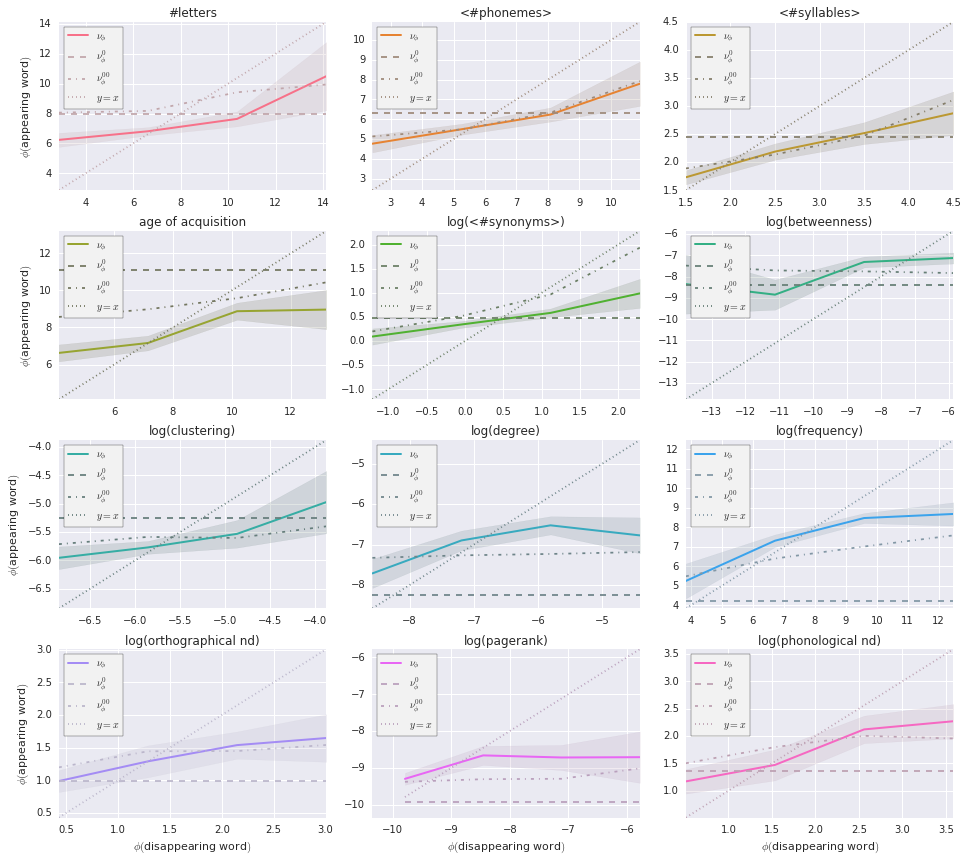

In [7]:
ordered_features = sorted(Substitution.__features__,
                          key=lambda f: Substitution._transformed_feature(f).__doc__)
g = sb.FacetGrid(data=variations, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_variation, 'source', 'destination')
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$)$')
g.set_ylabels(r'$\phi($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_variations-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative features.

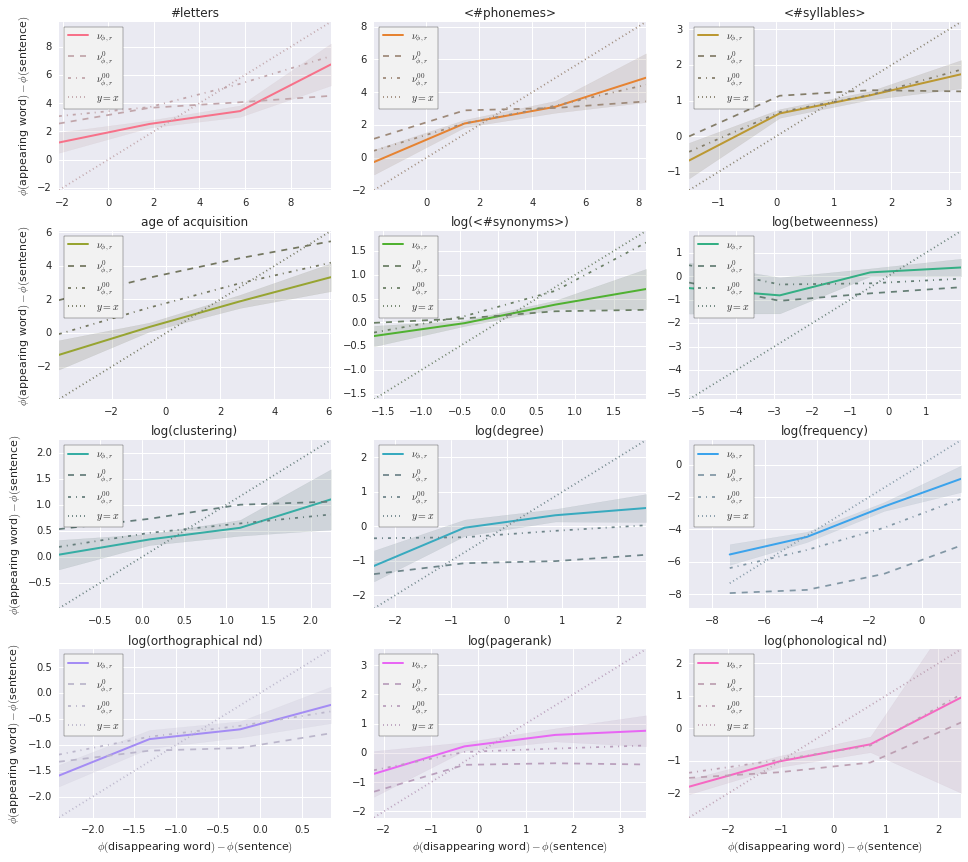

In [8]:
g = sb.FacetGrid(data=variations, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_variation, 'source', 'destination', relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$) - \phi($sentence$)$')
g.set_ylabels(r'$\phi($appearing word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_variations-relative'),
                  bbox_inches='tight', dpi=300)

Then plot $\nu_{\phi} - \nu_{\phi}^{00}$ for each feature (i.e. the measured bias) to see how they compare

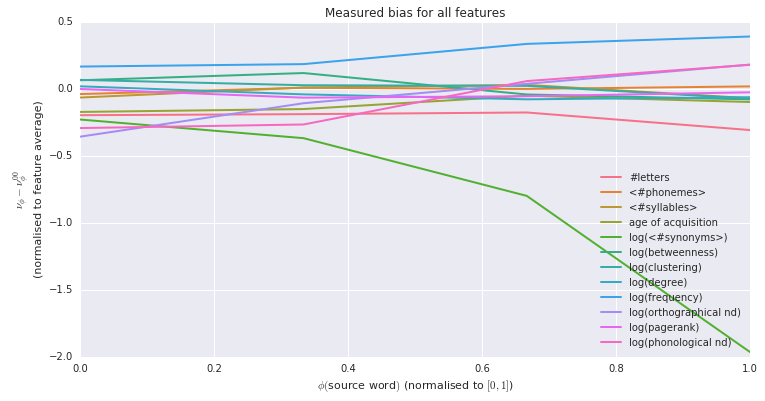

In [9]:
palette = sb.color_palette('husl', len(Substitution.__features__))
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(ordered_features):
    plot_bias(ax, variations[variations['feature'] == feature],
              color=palette[j], ci=False)
ax.legend(loc='lower right')
ax.set_title('Measured bias for all features')
ax.set_xlabel(r'$\phi($source word$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi} - \nu_{\phi}^{00}$' + '\n(normalised to feature average)')
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-feature_bias-absolute'),
                bbox_inches='tight', dpi=300)

Now with sentence-relative features.

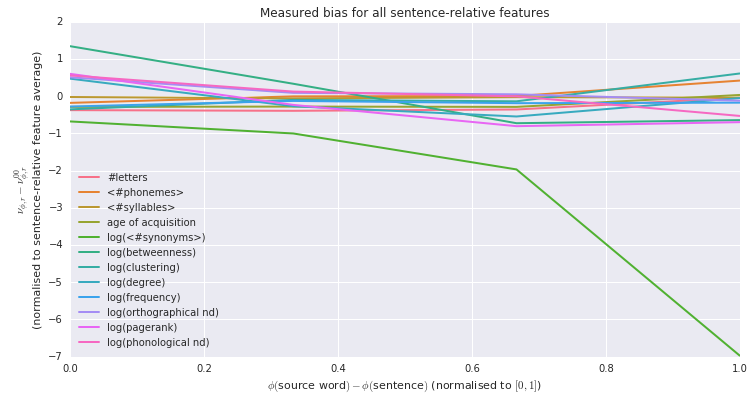

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(ordered_features):
    plot_bias(ax, variations[variations['feature'] == feature],
              color=palette[j], ci=False, relative=True)
ax.legend(loc='lower left')
ax.set_title('Measured bias for all sentence-relative features')
ax.set_xlabel(r'$\phi($source word$) - \phi($sentence$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$' +
              '\n(normalised to sentence-relative feature average)')
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-feature_bias-relative'),
                bbox_inches='tight', dpi=300)

### 2.3 Feature variations, reduced to features we expose in the paper

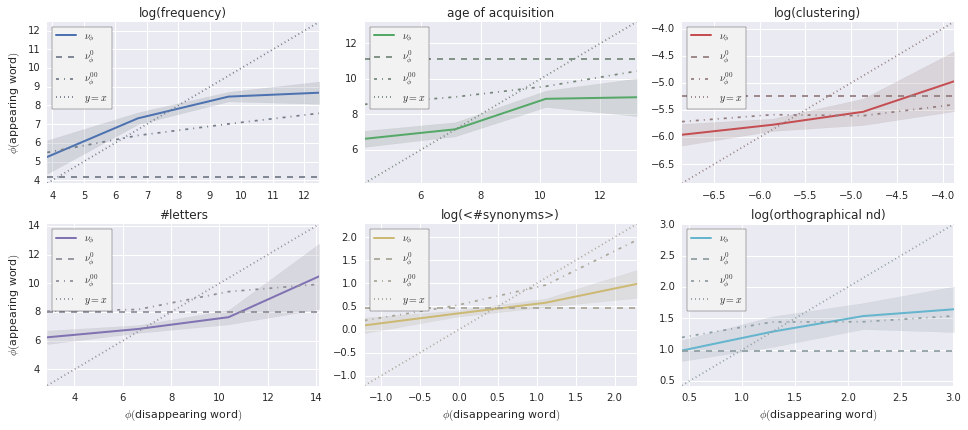

In [11]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_variation, 'source', 'destination')
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$)$')
g.set_ylabels(r'$\phi($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_variations-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative features.

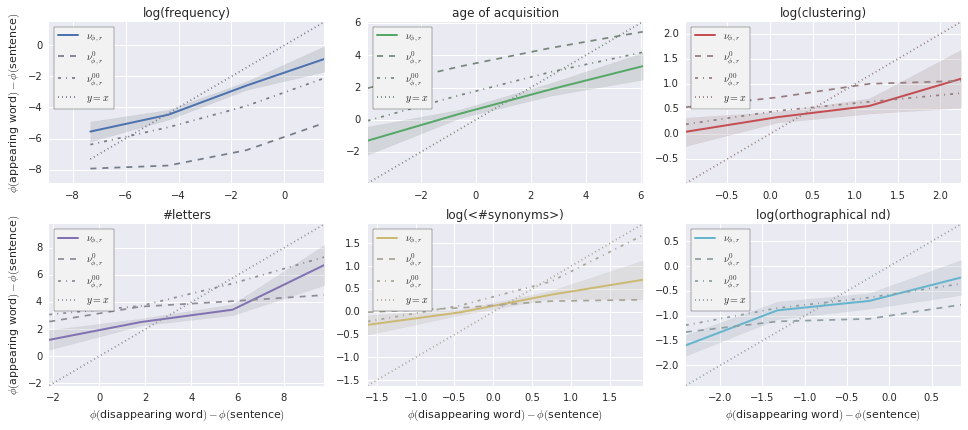

In [12]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_variation, 'source', 'destination', relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$) - \phi($sentence$)$')
g.set_ylabels(r'$\phi($appearing word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_variations-relative'),
                  bbox_inches='tight', dpi=300)

And the same with features relative to sentence average

Now $\nu_{\phi} - \nu_{\phi}^{00}$

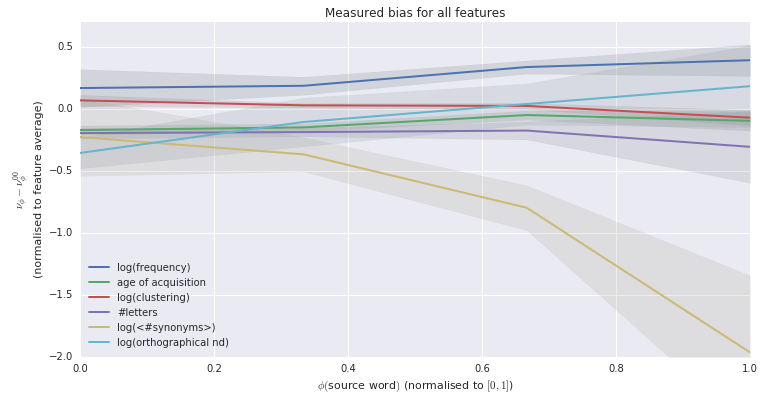

In [13]:
palette = sb.color_palette('deep', len(PAPER_FEATURES))
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(PAPER_FEATURES):
    plot_bias(ax, variations[variations['feature'] == feature],
              color=palette[j])
ax.legend(loc='lower left')
ax.set_title('Measured bias for all features')
ax.set_xlabel(r'$\phi($source word$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi} - \nu_{\phi}^{00}$' + '\n(normalised to feature average)')
ax.set_ylim(-2, .7)
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('paper-feature_bias-absolute'),
                bbox_inches='tight', dpi=300)

Now with sentence-relative features.

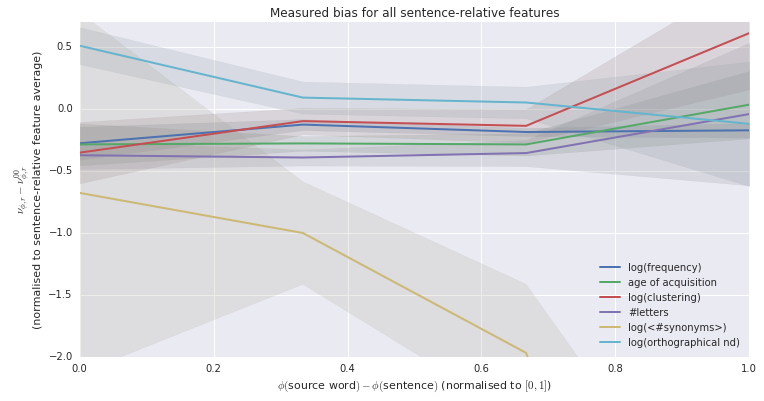

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(PAPER_FEATURES):
    plot_bias(ax, variations[variations['feature'] == feature],
              color=palette[j], relative=True)
ax.legend(loc='lower right')
ax.set_title('Measured bias for all sentence-relative features')
ax.set_xlabel(r'$\phi($source word$) - \phi($sentence$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$' +
              '\n(normalised to sentence-relative feature average)')
ax.set_ylim(-2, .7)
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('paper-feature_bias-relative'),
                bbox_inches='tight', dpi=300)

## 3 Streamplots

We'd like to see what happens between absolute and relative feature values, i.e. how do their effects interact. Especially, we want to know who wins between cognitive bias, attraction to sentence average, or attraction to global feature average.

To do this we plot the general direction (arrows) and strength (color) of where destination words are given a particular absolute/relative source feature couple. I.e., for a given absolute feature value and relative feature value, if this word were to be substituted, where would it go in this (absolute, relative) space?

The interesting thing in these plots is the attraction front, where all arrows point to and join. We're interested in:
* its slope
* its shape (e.g. several slope regimes?)
* its position w.r.t. $\nu_{\phi}^0$ and $y = 0$ (which is $\left< \phi(sentence) \right>$)

First, here's our plotting function. (Note we set the arrow size to something that turns out to be huge here, but gives normal sizes in the figures saves. There must be some dpi scaling problem with the arrows.)

In [15]:
def plot_stream(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    source = data['source']
    source_rel = data['source_rel']
    dest = data['destination']
    dest_rel = data['destination_rel']
    h0 = data['h0']
    
    # Compute binning.
    bin_count = 4
    x_bins, x_margins = pd.cut(source, bin_count, right=False, labels=False, retbins=True)
    x_middles = (x_margins[:-1] + x_margins[1:]) / 2
    y_bins, y_margins = pd.cut(source_rel, bin_count, right=False, labels=False, retbins=True)
    y_middles = (y_margins[:-1] + y_margins[1:]) / 2
    
    # Compute bin values.
    h0s = np.ones(bin_count) * h0.iloc[0]
    u_values = np.zeros((bin_count, bin_count))
    v_values = np.zeros((bin_count, bin_count))
    strength = np.zeros((bin_count, bin_count))
    for x in range(bin_count):
        for y in range(bin_count):
            u_values[y, x] = (dest[(x_bins == x) & (y_bins == y)] -
                              source[(x_bins == x) & (y_bins == y)]).mean()
            v_values[y, x] = (dest_rel[(x_bins == x) & (y_bins == y)] -
                              source_rel[(x_bins == x) & (y_bins == y)]).mean()
            strength[y, x] = np.sqrt((dest[(x_bins == x) & (y_bins == y)] - 
                                      source[(x_bins == x) & (y_bins == y)]) ** 2 +
                                     (dest_rel[(x_bins == x) & (y_bins == y)] - 
                                      source_rel[(x_bins == x) & (y_bins == y)]) ** 2).mean()
    
    # Plot.
    plt.streamplot(x_middles, y_middles, u_values, v_values,
                   arrowsize=4, color=strength, cmap=plt.cm.viridis)
    plt.plot(x_middles, np.zeros(bin_count), linestyle='-',
             color=sb.desaturate(color, 0.2), label=r'$\left< \phi(sentence) \right>$')
    plt.plot(h0s, y_middles, linestyle='--',
             color=sb.desaturate(color, 0.2), label=r'$\nu_{\phi}^0$')
    plt.xlim(x_middles[0], x_middles[-1])
    plt.ylim(y_middles[0], y_middles[-1])

Here are the plots for all features

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


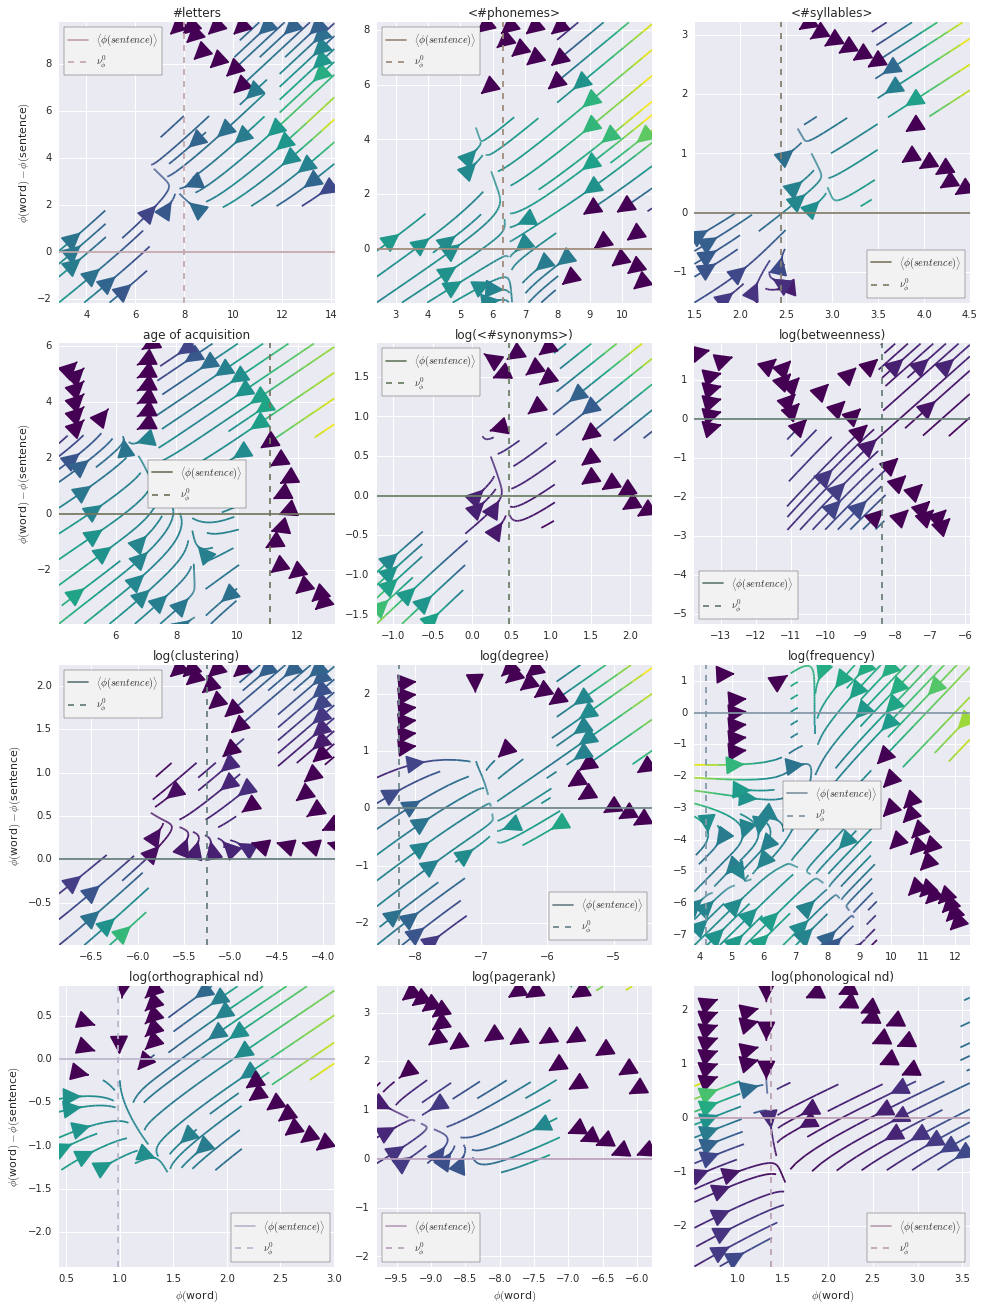

In [16]:
g = sb.FacetGrid(data=variations,
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_streams'),
                  bbox_inches='tight', dpi=300)

And here are the plots for the features we expose in the paper

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


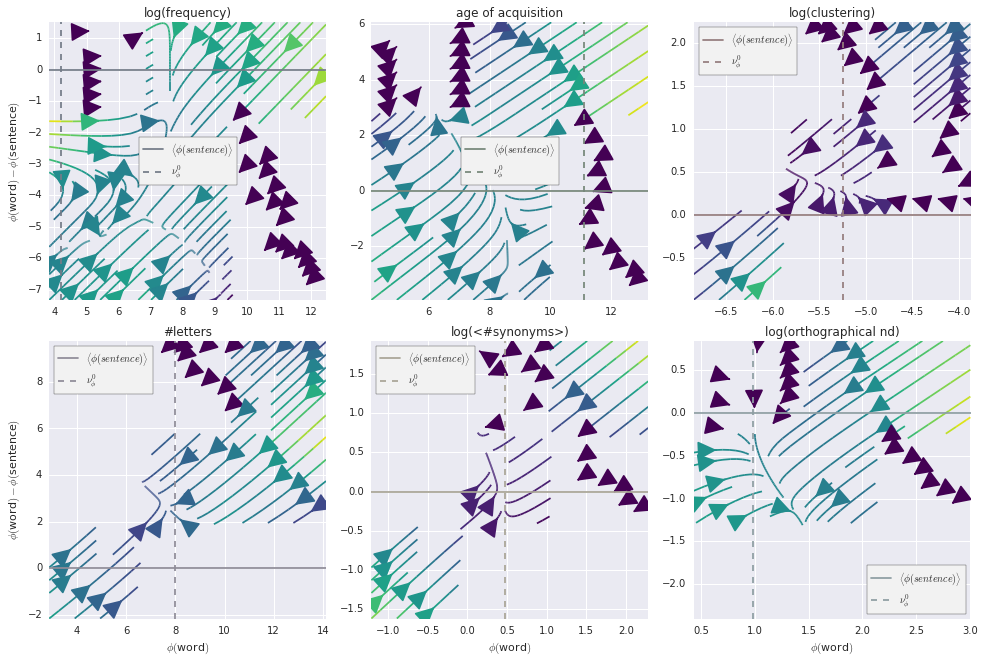

In [17]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_streams'),
                  bbox_inches='tight', dpi=300)

## 4 PCA'd feature variations

Compute PCA on feature *variations* (note: on variations, not on features directly), and show the evolution of the first three components upon substitution.

**CAVEAT**: the PCA is computed on variations where all features are defined. This greatly reduces the number of words included (and also the number of substitutions -- see below for real values, but you should know it's drastic). This also has an effect on the computation of $\mathcal{H}_0$ and $\mathcal{H}_{00}$, which are computed using words for which all features are defined. This, again, hugely reduces the number of words taken into account.

### 4.1 On all the features

Compute the actual PCA

In [18]:
# Compute the PCA.
pcafeatures = tuple(sorted(Substitution.__features__))
pcavariations = variations.pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:".format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 10 components.

Those explain the following variance:
[ 0.50610077  0.18537907  0.08818251  0.07722752  0.03662685  0.02696
  0.02391324  0.01924023  0.01311992  0.01153519]

We're plotting variation for the first 3 components:


,aoa,betweenness,clustering,degree,frequency,letters_count,orthographical_density,pagerank,phonemes_count,phonological_density,syllables_count,synonyms_count
Component-0,-0.510490,0.308361,-0.091586,0.258991,0.217496,-0.397198,0.209874,0.267598,-0.390098,0.261874,-0.165287,0.006944
Component-1,-0.309815,0.341166,-0.110425,0.277103,0.281281,0.468324,-0.171575,0.290884,0.470412,-0.218093,0.129886,-0.020511
Component-2,-0.609839,-0.165521,0.021430,0.012406,-0.752791,0.150666,-0.007359,-0.056137,0.040134,-0.030569,-0.010844,0.069455


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [19]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution.components(component, pca, pcafeatures)
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'component': component,
                         'source': source,
                         'destination': destination,
                         'h0': substitution.component_average(component, pca, pcafeatures),
                         'h0n': substitution.component_average(component, pca, pcafeatures,
                                                               source_synonyms=True)})

original_component_variations = pd.DataFrame(data)
del data

  0% (   1 of 8349) |             | Elapsed Time: 0:00:40 ETA:  3 days, 22:19:40

  1% ( 105 of 8349) |                      | Elapsed Time: 0:00:41 ETA:  0:00:28

  2% ( 209 of 8349) |                      | Elapsed Time: 0:00:42 ETA:  0:00:25

  3% ( 314 of 8349) |                      | Elapsed Time: 0:00:43 ETA:  0:00:22

  5% ( 418 of 8349) |#                     | Elapsed Time: 0:00:43 ETA:  0:00:19

  6% ( 522 of 8349) |#                     | Elapsed Time: 0:00:44 ETA:  0:00:18

  7% ( 627 of 8349) |#                     | Elapsed Time: 0:00:45 ETA:  0:00:19

  8% ( 731 of 8349) |#                     | Elapsed Time: 0:00:46 ETA:  0:00:19

 10% ( 835 of 8349) |##                    | Elapsed Time: 0:00:47 ETA:  0:00:21

 11% ( 940 of 8349) |##                    | Elapsed Time: 0:00:48 ETA:  0:00:23

 12% (1044 of 8349) |##                    | Elapsed Time: 0:00:49 ETA:  0:00:29

 13% (1148 of 8349) |###                   | Elapsed Time: 0:00:50 ETA:  0:00:28

 15% (1253 of 8349) |###                   | Elapsed Time: 0:00:51 ETA:  0:00:27

 16% (1357 of 8349) |###                   | Elapsed Time: 0:00:52 ETA:  0:00:25

 17% (1462 of 8349) |###                   | Elapsed Time: 0:00:52 ETA:  0:00:18

 18% (1566 of 8349) |####                  | Elapsed Time: 0:00:53 ETA:  0:00:15

 20% (1670 of 8349) |####                  | Elapsed Time: 0:00:54 ETA:  0:00:09

 21% (1775 of 8349) |####                  | Elapsed Time: 0:00:54 ETA:  0:00:07

 22% (1879 of 8349) |####                  | Elapsed Time: 0:00:55 ETA:  0:00:04

 23% (1983 of 8349) |#####                 | Elapsed Time: 0:00:56 ETA:  0:00:06

 25% (2088 of 8349) |#####                 | Elapsed Time: 0:00:57 ETA:  0:00:05

 26% (2192 of 8349) |#####                 | Elapsed Time: 0:00:58 ETA:  0:00:09

 27% (2296 of 8349) |######                | Elapsed Time: 0:00:59 ETA:  0:00:09

 28% (2401 of 8349) |######                | Elapsed Time: 0:01:00 ETA:  0:00:12

 30% (2505 of 8349) |######                | Elapsed Time: 0:01:01 ETA:  0:00:13

 31% (2610 of 8349) |######                | Elapsed Time: 0:01:02 ETA:  0:00:10

 32% (2714 of 8349) |#######               | Elapsed Time: 0:01:03 ETA:  0:00:07

 33% (2818 of 8349) |#######               | Elapsed Time: 0:01:03 ETA:  0:00:03

 35% (2923 of 8349) |#######               | Elapsed Time: 0:01:04 ETA:  0:00:01

 36% (3027 of 8349) |#######               | Elapsed Time: 0:01:05 ETA:  0:00:00

 37% (3131 of 8349) |########              | Elapsed Time: 0:01:05 ETA:  0:00:00

 38% (3236 of 8349) |########              | Elapsed Time: 0:01:06 ETA:  0:00:00

 40% (3340 of 8349) |########              | Elapsed Time: 0:01:07 ETA:  0:00:00

 41% (3444 of 8349) |#########             | Elapsed Time: 0:01:08 ETA:  0:00:00

 42% (3549 of 8349) |#########             | Elapsed Time: 0:01:08 ETA:  0:00:00

 43% (3653 of 8349) |#########             | Elapsed Time: 0:01:09 ETA:  0:00:00

 45% (3758 of 8349) |#########             | Elapsed Time: 0:01:10 ETA:  0:00:00

 46% (3862 of 8349) |##########            | Elapsed Time: 0:01:11 ETA:  0:00:00

 47% (3966 of 8349) |##########            | Elapsed Time: 0:01:12 ETA:  0:00:00

 48% (4071 of 8349) |##########            | Elapsed Time: 0:01:12 ETA:  0:00:00

 50% (4175 of 8349) |###########           | Elapsed Time: 0:01:13 ETA:  0:00:00

 51% (4279 of 8349) |###########           | Elapsed Time: 0:01:14 ETA:  0:00:00

 52% (4384 of 8349) |###########           | Elapsed Time: 0:01:15 ETA:  0:00:00

 53% (4488 of 8349) |###########           | Elapsed Time: 0:01:15 ETA:  0:00:00

 55% (4592 of 8349) |############          | Elapsed Time: 0:01:16 ETA:  0:00:00

 56% (4697 of 8349) |############          | Elapsed Time: 0:01:17 ETA:  0:00:00

 57% (4801 of 8349) |############          | Elapsed Time: 0:01:18 ETA:  0:00:00

 58% (4906 of 8349) |############          | Elapsed Time: 0:01:19 ETA:  0:00:00

 60% (5010 of 8349) |#############         | Elapsed Time: 0:01:19 ETA:  0:00:00

 61% (5114 of 8349) |#############         | Elapsed Time: 0:01:20 ETA:  0:00:00

 62% (5219 of 8349) |#############         | Elapsed Time: 0:01:21 ETA:  0:00:00

 63% (5323 of 8349) |##############        | Elapsed Time: 0:01:22 ETA:  0:00:00

 65% (5427 of 8349) |##############        | Elapsed Time: 0:01:22 ETA:  0:00:00

 66% (5532 of 8349) |##############        | Elapsed Time: 0:01:23 ETA:  0:00:00

 67% (5636 of 8349) |##############        | Elapsed Time: 0:01:24 ETA:  0:00:00

 68% (5740 of 8349) |###############       | Elapsed Time: 0:01:25 ETA:  0:00:00

 70% (5845 of 8349) |###############       | Elapsed Time: 0:01:26 ETA:  0:00:00

 71% (5949 of 8349) |###############       | Elapsed Time: 0:01:27 ETA:  0:00:00

 72% (6054 of 8349) |###############       | Elapsed Time: 0:01:28 ETA:  0:00:00

 73% (6158 of 8349) |################      | Elapsed Time: 0:01:28 ETA:  0:00:00

 75% (6262 of 8349) |################      | Elapsed Time: 0:01:29 ETA:  0:00:00

 76% (6367 of 8349) |################      | Elapsed Time: 0:01:30 ETA:  0:00:00

 77% (6471 of 8349) |#################     | Elapsed Time: 0:01:31 ETA:  0:00:00

 78% (6575 of 8349) |#################     | Elapsed Time: 0:01:32 ETA:  0:00:00

 80% (6680 of 8349) |#################     | Elapsed Time: 0:01:32 ETA:  0:00:00

 81% (6784 of 8349) |#################     | Elapsed Time: 0:01:33 ETA:  0:00:00

 82% (6888 of 8349) |##################    | Elapsed Time: 0:01:34 ETA:  0:00:00

 83% (6993 of 8349) |##################    | Elapsed Time: 0:01:35 ETA:  0:00:00

 85% (7097 of 8349) |##################    | Elapsed Time: 0:01:36 ETA:  0:00:00

 86% (7202 of 8349) |##################    | Elapsed Time: 0:01:36 ETA:  0:00:00

 87% (7306 of 8349) |###################   | Elapsed Time: 0:01:37 ETA:  0:00:00

 88% (7410 of 8349) |###################   | Elapsed Time: 0:01:38 ETA:  0:00:00

 90% (7515 of 8349) |###################   | Elapsed Time: 0:01:39 ETA:  0:00:00

 91% (7619 of 8349) |####################  | Elapsed Time: 0:01:39 ETA:  0:00:00

 92% (7723 of 8349) |####################  | Elapsed Time: 0:01:40 ETA:  0:00:00

 93% (7828 of 8349) |####################  | Elapsed Time: 0:01:41 ETA:  0:00:00

 95% (7932 of 8349) |####################  | Elapsed Time: 0:01:42 ETA:  0:00:00

 96% (8036 of 8349) |##################### | Elapsed Time: 0:01:42 ETA:  0:00:00

 97% (8141 of 8349) |##################### | Elapsed Time: 0:01:43 ETA:  0:00:00

 98% (8245 of 8349) |##################### | Elapsed Time: 0:01:44 ETA:  0:00:00

100% (8349 of 8349) |######################| Elapsed Time: 0:01:45 Time: 0:01:45


Compute cluster averages (so as not to overestimate confidence intervals).

In [20]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'component'], as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components (**see the caveat section below**)

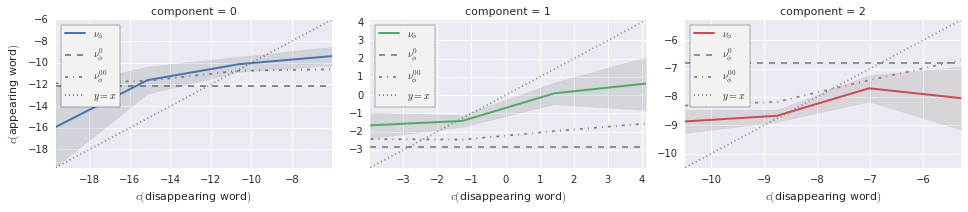

In [21]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation, 'source', 'destination')
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.2 On the features we expose in the paper

Compute the actual PCA

In [22]:
# Compute the PCA.
pcafeatures = tuple(sorted(PAPER_FEATURES))
pcavariations = variations[variations['feature'].map(lambda f: f in pcafeatures)]\
    .pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:".format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 3 components.

Those explain the following variance:
[ 0.54921607  0.20199796  0.15148959]

We're plotting variation for the first 3 components:


,aoa,clustering,frequency,letters_count,orthographical_density,synonyms_count
Component-0,-0.735673,-0.102056,0.274248,-0.543353,0.278975,0.009930
Component-1,0.436354,0.131498,-0.454443,-0.733256,0.218198,-0.022570
Component-2,-0.488659,0.012290,-0.840634,0.222408,-0.026864,0.064884


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [23]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution.components(component, pca, pcafeatures)
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'component': component,
                         'source': source,
                         'destination': destination,
                         'h0': substitution.component_average(component, pca, pcafeatures),
                         'h0n': substitution.component_average(component, pca, pcafeatures,
                                                               source_synonyms=True)})

original_component_variations = pd.DataFrame(data)
del data

  0% (   1 of 8349) |               | Elapsed Time: 0:00:12 ETA:  1 day, 5:19:41

  1% ( 105 of 8349) |                      | Elapsed Time: 0:00:13 ETA:  0:00:50

  2% ( 209 of 8349) |                      | Elapsed Time: 0:00:14 ETA:  0:00:45

  3% ( 314 of 8349) |                      | Elapsed Time: 0:00:14 ETA:  0:00:43

  5% ( 418 of 8349) |#                     | Elapsed Time: 0:00:15 ETA:  0:00:41

  6% ( 522 of 8349) |#                     | Elapsed Time: 0:00:16 ETA:  0:00:40

  7% ( 627 of 8349) |#                     | Elapsed Time: 0:00:16 ETA:  0:00:41

  8% ( 731 of 8349) |#                     | Elapsed Time: 0:00:17 ETA:  0:00:41

 10% ( 835 of 8349) |##                    | Elapsed Time: 0:00:18 ETA:  0:00:42

 11% ( 940 of 8349) |##                    | Elapsed Time: 0:00:19 ETA:  0:00:43

 12% (1044 of 8349) |##                    | Elapsed Time: 0:00:20 ETA:  0:00:43

 13% (1148 of 8349) |###                   | Elapsed Time: 0:00:21 ETA:  0:00:41

 15% (1253 of 8349) |###                   | Elapsed Time: 0:00:22 ETA:  0:00:42

 16% (1357 of 8349) |###                   | Elapsed Time: 0:00:22 ETA:  0:00:41

 17% (1462 of 8349) |###                   | Elapsed Time: 0:00:23 ETA:  0:00:40

 18% (1566 of 8349) |####                  | Elapsed Time: 0:00:23 ETA:  0:00:38

 20% (1670 of 8349) |####                  | Elapsed Time: 0:00:24 ETA:  0:00:35

 21% (1775 of 8349) |####                  | Elapsed Time: 0:00:25 ETA:  0:00:31

 22% (1879 of 8349) |####                  | Elapsed Time: 0:00:25 ETA:  0:00:29

 23% (1983 of 8349) |#####                 | Elapsed Time: 0:00:26 ETA:  0:00:28

 25% (2088 of 8349) |#####                 | Elapsed Time: 0:00:27 ETA:  0:00:29

 26% (2192 of 8349) |#####                 | Elapsed Time: 0:00:28 ETA:  0:00:29

 27% (2296 of 8349) |######                | Elapsed Time: 0:00:29 ETA:  0:00:28

 28% (2401 of 8349) |######                | Elapsed Time: 0:00:30 ETA:  0:00:29

 30% (2505 of 8349) |######                | Elapsed Time: 0:00:30 ETA:  0:00:29

 31% (2610 of 8349) |######                | Elapsed Time: 0:00:31 ETA:  0:00:29

 32% (2714 of 8349) |#######               | Elapsed Time: 0:00:32 ETA:  0:00:31

 33% (2818 of 8349) |#######               | Elapsed Time: 0:00:32 ETA:  0:00:29

 35% (2923 of 8349) |#######               | Elapsed Time: 0:00:33 ETA:  0:00:25

 36% (3027 of 8349) |#######               | Elapsed Time: 0:00:34 ETA:  0:00:23

 37% (3131 of 8349) |########              | Elapsed Time: 0:00:34 ETA:  0:00:21

 38% (3236 of 8349) |########              | Elapsed Time: 0:00:35 ETA:  0:00:21

 40% (3340 of 8349) |########              | Elapsed Time: 0:00:36 ETA:  0:00:19

 41% (3444 of 8349) |#########             | Elapsed Time: 0:00:37 ETA:  0:00:18

 42% (3549 of 8349) |#########             | Elapsed Time: 0:00:37 ETA:  0:00:18

 43% (3653 of 8349) |#########             | Elapsed Time: 0:00:38 ETA:  0:00:16

 45% (3758 of 8349) |#########             | Elapsed Time: 0:00:39 ETA:  0:00:17

 46% (3862 of 8349) |##########            | Elapsed Time: 0:00:40 ETA:  0:00:17

 47% (3966 of 8349) |##########            | Elapsed Time: 0:00:43 ETA:  0:00:39

 48% (4071 of 8349) |##########            | Elapsed Time: 0:00:43 ETA:  0:00:38

 50% (4175 of 8349) |###########           | Elapsed Time: 0:00:44 ETA:  0:00:38

 51% (4279 of 8349) |###########           | Elapsed Time: 0:00:45 ETA:  0:00:38

 52% (4384 of 8349) |###########           | Elapsed Time: 0:00:46 ETA:  0:00:39

 53% (4488 of 8349) |###########           | Elapsed Time: 0:00:47 ETA:  0:00:39

 55% (4592 of 8349) |############          | Elapsed Time: 0:00:47 ETA:  0:00:37

 56% (4697 of 8349) |############          | Elapsed Time: 0:00:48 ETA:  0:00:36

 57% (4801 of 8349) |############          | Elapsed Time: 0:00:49 ETA:  0:00:12

 58% (4906 of 8349) |############          | Elapsed Time: 0:00:50 ETA:  0:00:11

 60% (5010 of 8349) |#############         | Elapsed Time: 0:00:50 ETA:  0:00:11

 61% (5114 of 8349) |#############         | Elapsed Time: 0:00:51 ETA:  0:00:09

 62% (5219 of 8349) |#############         | Elapsed Time: 0:00:52 ETA:  0:00:06

 63% (5323 of 8349) |##############        | Elapsed Time: 0:00:53 ETA:  0:00:06

 65% (5427 of 8349) |##############        | Elapsed Time: 0:00:53 ETA:  0:00:05

 66% (5532 of 8349) |##############        | Elapsed Time: 0:00:54 ETA:  0:00:04

 67% (5636 of 8349) |##############        | Elapsed Time: 0:00:55 ETA:  0:00:03

 68% (5740 of 8349) |###############       | Elapsed Time: 0:00:55 ETA:  0:00:02

 70% (5845 of 8349) |###############       | Elapsed Time: 0:00:56 ETA:  0:00:00

 71% (5949 of 8349) |###############       | Elapsed Time: 0:00:57 ETA:  0:00:00

 72% (6054 of 8349) |###############       | Elapsed Time: 0:00:58 ETA:  0:00:00

 73% (6158 of 8349) |################      | Elapsed Time: 0:00:58 ETA:  0:00:00

 75% (6262 of 8349) |################      | Elapsed Time: 0:00:59 ETA:  0:00:00

 76% (6367 of 8349) |################      | Elapsed Time: 0:01:00 ETA:  0:00:00

 77% (6471 of 8349) |#################     | Elapsed Time: 0:01:00 ETA:  0:00:00

 78% (6575 of 8349) |#################     | Elapsed Time: 0:01:01 ETA:  0:00:00

 80% (6680 of 8349) |#################     | Elapsed Time: 0:01:02 ETA:  0:00:00

 81% (6784 of 8349) |#################     | Elapsed Time: 0:01:02 ETA:  0:00:00

 82% (6888 of 8349) |##################    | Elapsed Time: 0:01:03 ETA:  0:00:00

 83% (6993 of 8349) |##################    | Elapsed Time: 0:01:04 ETA:  0:00:00

 85% (7097 of 8349) |##################    | Elapsed Time: 0:01:05 ETA:  0:00:00

 86% (7202 of 8349) |##################    | Elapsed Time: 0:01:05 ETA:  0:00:00

 87% (7306 of 8349) |###################   | Elapsed Time: 0:01:06 ETA:  0:00:00

 88% (7410 of 8349) |###################   | Elapsed Time: 0:01:07 ETA:  0:00:00

 90% (7515 of 8349) |###################   | Elapsed Time: 0:01:07 ETA:  0:00:00

 91% (7619 of 8349) |####################  | Elapsed Time: 0:01:08 ETA:  0:00:00

 92% (7723 of 8349) |####################  | Elapsed Time: 0:01:09 ETA:  0:00:00

 93% (7828 of 8349) |####################  | Elapsed Time: 0:01:10 ETA:  0:00:00

 95% (7932 of 8349) |####################  | Elapsed Time: 0:01:10 ETA:  0:00:00

 96% (8036 of 8349) |##################### | Elapsed Time: 0:01:11 ETA:  0:00:00

 97% (8141 of 8349) |##################### | Elapsed Time: 0:01:12 ETA:  0:00:00

 98% (8245 of 8349) |##################### | Elapsed Time: 0:01:12 ETA:  0:00:00

100% (8349 of 8349) |######################| Elapsed Time: 0:01:13 Time: 0:01:13


Compute cluster averages (so as not to overestimate confidence intervals).

In [24]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'component'], as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components

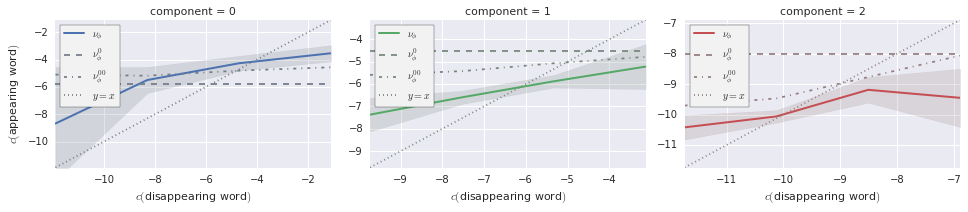

In [25]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation, 'source', 'destination')
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.3 CAVEAT: reduction of the numbers of words and substitutions

As explained above, this PCA analysis can only use words for which *all* the features are defined (in this case, the features listed in `PAPER_FEATURES`). So note the following:

In [26]:
for feature in PAPER_FEATURES:
    print("Feature '{}' is based on {} words."
          .format(feature, len(Substitution._transformed_feature(feature)())))

# Compute the number of words that have all PAPER_FEATURES defined.
words = set()
for tfeature in [Substitution._transformed_feature(feature) for feature in PAPER_FEATURES]:
    words.update(tfeature())

data = dict((feature, []) for feature in PAPER_FEATURES)
words_list = []
for word in words:
    words_list.append(word)
    for feature in PAPER_FEATURES:
        data[feature].append(Substitution._transformed_feature(feature)(word))
wordsdf = pd.DataFrame(data)
wordsdf['words'] = words_list
del words_list, data

print()
print("Among all the set of words used by these features, only {} are used."
      .format(len(wordsdf.dropna())))

print()
print("Similarly, we mined {} (cluster-unique) substitutions, but the PCA is in fact"
      " computed on {} of them (those where all features are defined)."
      .format(len(set(variations['cluster_id'])), len(pcavariations)))

Feature 'frequency' is based on 33450 words.
Feature 'aoa' is based on 30102 words.
Feature 'clustering' is based on 5739 words.
Feature 'letters_count' is based on 42786 words.
Feature 'synonyms_count' is based on 147306 words.
Feature 'orthographical_density' is based on 27751 words.



Among all the set of words used by these features, only 3322 are used.

Similarly, we mined 795 (cluster-unique) substitutions, but the PCA is in fact computed on 227 of them (those where all features are defined).


The way $\mathcal{H}_0$ and $\mathcal{H}_{00}$ are computed makes them also affected by this.